In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

Load The Data

In [4]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/train.csv')

Exploring Data

In [5]:
train_data.head()
train_data.info()
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12463 entries, 0 to 12462
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              12463 non-null  object 
 1   UNDER_CONSTRUCTION     12463 non-null  int64  
 2   RERA                   12463 non-null  int64  
 3   BHK_NO.                12463 non-null  int64  
 4   BHK_OR_RK              12463 non-null  object 
 5   SQUARE_FT              12463 non-null  float64
 6   READY_TO_MOVE          12463 non-null  int64  
 7   RESALE                 12463 non-null  int64  
 8   ADDRESS                12463 non-null  object 
 9   LONGITUDE              12463 non-null  float64
 10  LATITUDE               12462 non-null  float64
 11  TARGET(PRICE_IN_LACS)  12462 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


UNDER_CONSTRUCTION          RERA       BHK_NO.     SQUARE_FT  \
count        12463.000000  12463.000000  12463.000000  1.246300e+04   
mean             0.184145      0.319024      2.382091  3.734933e+04   
std              0.387618      0.466117      0.855209  2.831791e+06   
min              0.000000      0.000000      1.000000  3.000000e+00   
25%              0.000000      0.000000      2.000000  8.966801e+02   
50%              0.000000      0.000000      2.000000  1.170095e+03   
75%              0.000000      1.000000      3.000000  1.550000e+03   
max              1.000000      1.000000     20.000000  2.545455e+08   

       READY_TO_MOVE        RESALE     LONGITUDE      LATITUDE  \
count   12463.000000  12463.000000  12463.000000  12462.000000   
mean        0.815855      0.930354     21.290693     76.811747   
std         0.387618      0.254560      6.148315     10.712823   
min         0.000000      0.000000     -6.240302   -117.001699   
25%         1.000000      1.000000     18.452663     73.775880   
50%         1.000000      1.000000     20.386816     77.320000   
75%         1.000000      1.000000     26.894868     77.786000   
max         1.000000      1.000000     59.912884    136.000000   

       TARGET(PRICE_IN_LACS)  
count           12462.000000  
mean              147.767281  
std               718.586852  
min                 0.850000  
25%                37.000000  
50%                61.000000  
75%               100.000000  
max             30000.000000

In [6]:
categorical_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']
print(categorical_cols)

['POSTED_BY', 'BHK_OR_RK', 'ADDRESS']


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])


In [8]:
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)

In [9]:
data = pd.read_csv('train.csv')  # Load your data into the 'data' variable

data['ADDRESS'] = data['ADDRESS'].str.split(',').apply(lambda x: x[-1])
data

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
12458    Dealer                   0     1        3       BHK  1345.154387   
12459    Dealer                   1     0        1       BHK   425.019031   
12460     Owner                   0     0        2       BHK  8723.404255   
12461    Dealer                   0     0        1       BHK   560.014934   
12462    Dealer                   0     0        2       BHK  1000.000000   

       READY_TO_MOVE  RESALE      ADDRESS  LONGITUDE   LATITUDE  \
0                  1       1    Bangalore  12.969910  77.597960   
1                  1       1       Mysore  12.274538  76.644605   
2                  1       1    Bangalore  12.778033  77.632191   
3                  1       1    Ghaziabad  28.642300  77.344500   
4                  0       1      Kolkata  22.592200  88.484911   
...              ...     ...          ...        ...        ...   
12458              1       1         Pune  19.957301  73.839897   
12459              0       1  Maharashtra  19.139348  72.820458   
12460              1       1    Ghaziabad  28.671102  77.329251   
12461              1       1  Maharashtra  19.040416  73.078151   
12462              1       1    Bangalore   1.000000        NaN   

       TARGET(PRICE_IN_LACS)  
0                       55.0  
1                       51.0  
2                       43.0  
3                       62.5  
4                       60.5  
...                      ...  
12458                   88.0  
12459                   67.0  
12460                   41.0  
12461                   60.0  
12462                    NaN  

[12463 rows x 12 columns]

In [10]:
tier_1 = ["Ahmedabad", "Bengaluru", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai", "Pune"]
tier_2 = ["Agra", "Ajmer", "Aligarh", "Amravati", "Amritsar", "Asansol", "Aurangabad", "Bareilly", "Belgaum",
          "Bhavnagar", "Bhiwandi", "Bhopal", "Bhubaneswar","Bikaner", "Bilaspur", "Bokaro Steel City","Chandigarh",
          "Coimbatore", "Cuttack"," Dehradun","Dhanbad", "Bhilai","Durgapur", "Erode", "Faridabad", "Firozabad", "Ghaziabad",
          "Gorakhpur", "Gulbarga", "Guntur", "Gwalior", "Gurugram", "Guwahati", "Hamirpur", "Hubli–Dharwad", "Indore", "Jabalpur",
          "Jaipur", "Jalandhar", "Jalgaon", "Jammu", "Jamnagar", "Jamshedpur", "Jhansi", "Jodhpur","Navi Mumbai" ,"Kakinada", "Kannur",
          " Kanpur", "Karnal", "Kochi"," Kolhapur", "Kollam", "Kozhikode", "Kurnool", "Ludhiana","Lucknow","Madurai", "Malappuram",
          " Mathura", "Mangalore", "Meerut", "Moradabad", "Mysore", "Nagpur"," Nanded"," Nashik", "Nellore","Navi Mumbai","Noid", "Patna",
          "Puducherry", "Purulia", "Prayagraj", "Raipur","Rajkot", "Rajamahendravaram"," Ranchi", "Rourkela", "Ratlam", "Salem", "Sangli",
          "Shimla", "Siliguri"," Solapur", "Srinagar", "Surat", "Thanjavur", "Thiruvananthapuram", "Thrissur", "Tiruchirappalli", "Tirunelveli",
          "Tiruvannamalai", "Ujjain", "Vijayapura", "Vadodara", "Varanasi", "Vasai-Virar City", "Vijayawada", "Visakhapatnam", "Vellore", "Warangal"]

def mapping_city(city):

    if city in tier_1:
        return 0

    elif city in tier_2:
        return 1

    else:
        return 2

data['City_Tier'] = data['ADDRESS'].apply(mapping_city)
data

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
12458    Dealer                   0     1        3       BHK  1345.154387   
12459    Dealer                   1     0        1       BHK   425.019031   
12460     Owner                   0     0        2       BHK  8723.404255   
12461    Dealer                   0     0        1       BHK   560.014934   
12462    Dealer                   0     0        2       BHK  1000.000000   

       READY_TO_MOVE  RESALE      ADDRESS  LONGITUDE   LATITUDE  \
0                  1       1    Bangalore  12.969910  77.597960   
1                  1       1       Mysore  12.274538  76.644605   
2                  1       1    Bangalore  12.778033  77.632191   
3                  1       1    Ghaziabad  28.642300  77.344500   
4                  0       1      Kolkata  22.592200  88.484911   
...              ...     ...          ...        ...        ...   
12458              1       1         Pune  19.957301  73.839897   
12459              0       1  Maharashtra  19.139348  72.820458   
12460              1       1    Ghaziabad  28.671102  77.329251   
12461              1       1  Maharashtra  19.040416  73.078151   
12462              1       1    Bangalore   1.000000        NaN   

       TARGET(PRICE_IN_LACS)  City_Tier  
0                       55.0          2  
1                       51.0          1  
2                       43.0          2  
3                       62.5          1  
4                       60.5          0  
...                      ...        ...  
12458                   88.0          0  
12459                   67.0          2  
12460                   41.0          1  
12461                   60.0          2  
12462                    NaN          2  

[12463 rows x 13 columns]

Analyse data

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

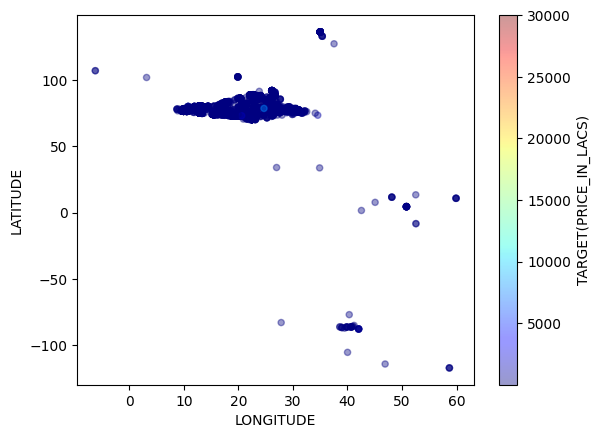

In [11]:
data.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',alpha=0.4,c="TARGET(PRICE_IN_LACS)",
          cmap=plt.get_cmap("jet"),colorbar=True)

In [13]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

map = folium.Map(location=[22.00,78.00], tiles='cartodbpositron', zoom_start=6)

# Filter out rows with missing coordinates before plotting
for _, row in data.dropna(subset=['LONGITUDE', 'LATITUDE']).iterrows():
    Circle(
        location=[row['LONGITUDE'], row['LATITUDE']],
        radius=100,
        color='blue'
    ).add_to(map)

# Display the map
map

In [17]:
x_train = data.drop(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'TARGET(PRICE_IN_LACS)', "City_Tier"], axis=1)
y_train = data['TARGET(PRICE_IN_LACS)']
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [24]:
X = train_data.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = train_data['TARGET(PRICE_IN_LACS)']


In [41]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
X = data.drop('TARGET(PRICE_IN_LACS)', axis=1)  # Features
y = data['TARGET(PRICE_IN_LACS)']  # Target variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now you can drop columns from x_test
x_test = x_test.drop(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS', 'LATITUDE', 'LONGITUDE'], axis=1)

In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 303.15497152270166


In [34]:
test_predictions = model.predict(test_data.drop('TARGET(PRICE_IN_LACS)', axis=1, errors='ignore'))
submission = pd.DataFrame({
    'Id': test_data.index,
    'TARGET(PRICE_IN_LACS)': test_predictions
})
submission.to_csv('submission.csv', index=False)

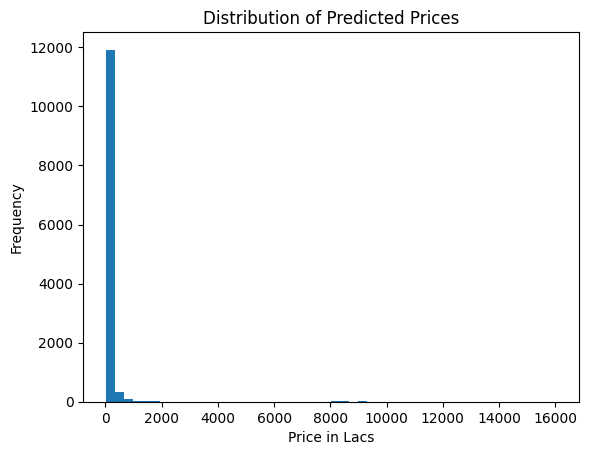

In [36]:
import matplotlib.pyplot as plt
plt.hist(submission['TARGET(PRICE_IN_LACS)'], bins=50)
plt.title('Distribution of Predicted Prices')
plt.xlabel('Price in Lacs')
plt.ylabel('Frequency')
plt.show()
